# Analysis Reults

3ML stores the results of a fit in a container we call and "Analysis Result" (AR). The structure of this object is designed to be useable in a *live* sense within an active analysis (python script, ipython interactive shell, jupyter notebook) as well as storable as a FITS file for saving results for later.

The structure is nearly the same between MLE and Bayesian analyses. 


In [2]:
from threeML import *

from threeML.analysis_results import *

from threeML.io.progress_bar import progress_bar

%matplotlib notebook
import matplotlib.pyplot as plt

import astropy.units as u


Let's take a look at what we can do with AR. These are the same simulated dataset we use in the test of the XY plugin:

Using Gaussian statistic (equivalent to chi^2) with the provided errors.


<IPython.core.display.Javascript object>


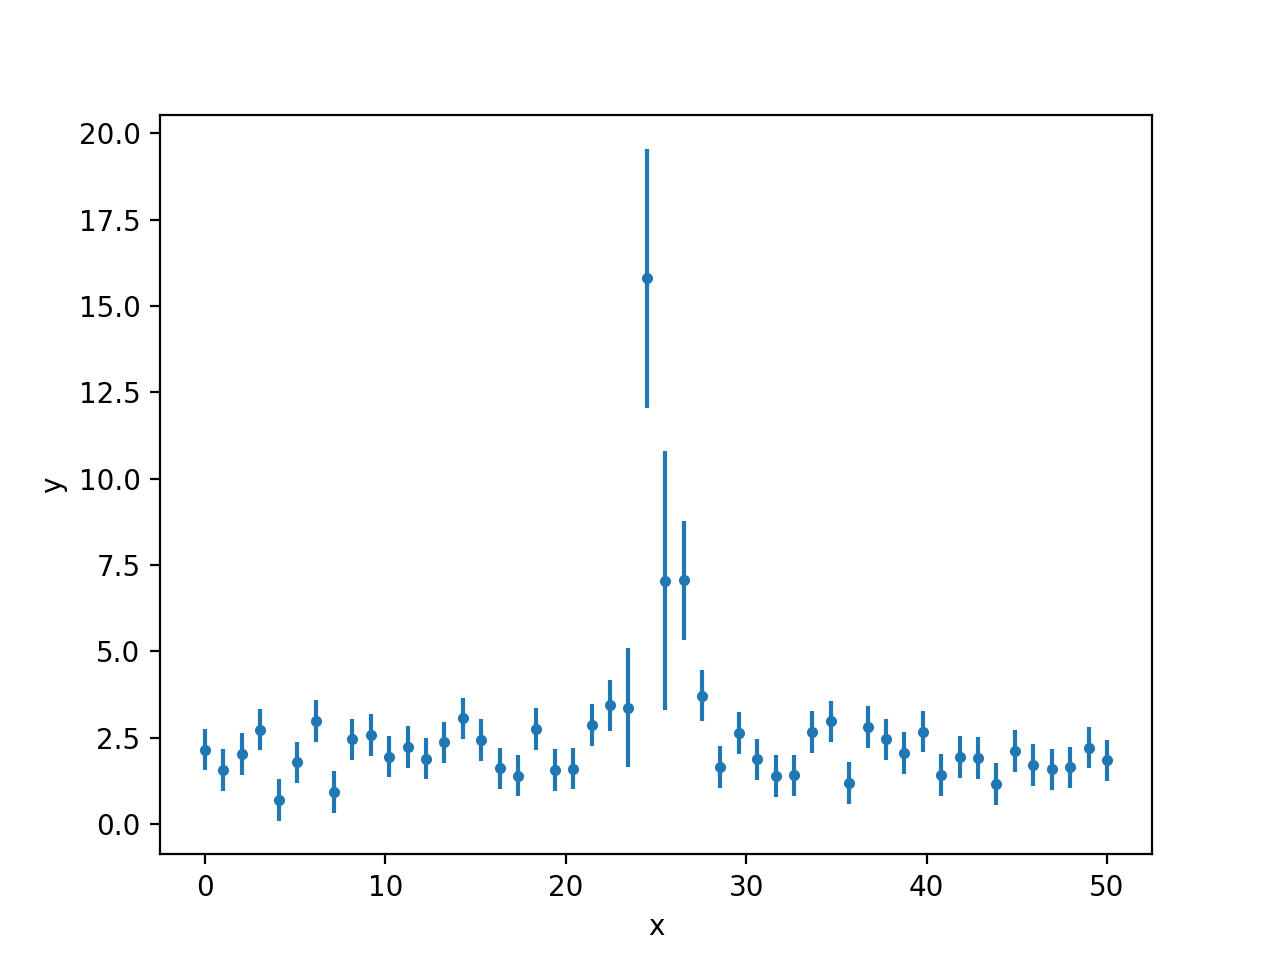

In [3]:

gen_function = Line(a=0.,b=2) + Gaussian(F=30., mu=25., sigma=1)


# Generate a dataset using the power law, and a
# constant 30% error

x = np.linspace(0, 50, 50)

xy = XYLike.from_function("sim_data",
                          function = gen_function, 
                          x = x,
                          yerr = 0.3 * gen_function(x))

xy.plot();

## MLE Results


First we will demonstrate how AR's work for an MLE analysis on our synthetic data. As we will see, most of the functionality exists in the Bayesian AR's as well. 

Let's do a simple likelihood maximization of our data and model.

In [4]:


fitfun = Line() + Gaussian()

fitfun.a_1.bounds = (-10, 10.0)
fitfun.b_1.bounds = (-100, 100.0)
fitfun.F_2 = 25.0
fitfun.F_2.bounds = (1e-3, 200.0)
fitfun.mu_2 = 25.0
fitfun.mu_2.bounds = (0.0, 100.0)
fitfun.sigma_2.bounds = (1e-3, 10.0)

model = Model(PointSource('fake',0.0, 0.0, fitfun))

data = DataList(xy)

jl = JointLikelihood(model, DataList(xy))
_ = jl.fit()

Best fit values:



,result,unit
parameter,,
fake.spectrum.main.composite.a_1,(-3.000 +/- 6) x 10^-3,1 / (cm2 keV2 s)
fake.spectrum.main.composite.b_1,2.090 +/- 0.17,1 / (cm2 keV s)
fake.spectrum.main.composite.F_2,(2.800 +/- 0.6) x 10,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,(2.512 +/- 0.021) x 10,keV
fake.spectrum.main.composite.sigma_2,1.320 +/- 0.21,keV



Correlation matrix:



1.00,-0.84,-0.00,-0.04,0.01
-0.84,1.00,-0.04,0.06,-0.12
-0.00,-0.04,1.00,-0.05,-0.34
-0.04,0.06,-0.05,1.00,-0.26
0.01,-0.12,-0.34,-0.26,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
sim_data,23.515847
total,23.515847



Values of statistical measures:



,statistical measures
AIC,58.395330
BIC,66.591809


We can get our errors as always, but the results cannot be propagated (error propagation assumes Gaussian errors, i.e., symmetric errors)
In this case though errors are pretty symmetric, so we are likely in the case
where the MLE is actually normally distributed

In [5]:
jl.get_errors();

,result,unit
parameter,,
fake.spectrum.main.composite.a_1,(-3.000 +/- 6) x 10^-3,1 / (cm2 keV2 s)
fake.spectrum.main.composite.b_1,2.090 +/- 0.17,1 / (cm2 keV s)
fake.spectrum.main.composite.F_2,(2.800 +/- 0.6) x 10,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,(2.512 -0.021 +0.022) x 10,keV
fake.spectrum.main.composite.sigma_2,1.32 -0.19 +0.23,keV


Therefore, we need to get the AnalysisResults object that is created after a fit is performed. The AR object is a member of the JointLikelihood object

In [6]:
ar = jl.results

We can display the results of the analysis. Note, when a fit is performed, the post display is actaully from the internal AR.

In [7]:
ar.display()

Best fit values:



,result,unit
parameter,,
fake.spectrum.main.composite.a_1,(-3.000 +/- 6) x 10^-3,1 / (cm2 keV2 s)
fake.spectrum.main.composite.b_1,2.090 +/- 0.17,1 / (cm2 keV s)
fake.spectrum.main.composite.F_2,(2.800 +/- 0.6) x 10,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,(2.512 +/- 0.021) x 10,keV
fake.spectrum.main.composite.sigma_2,1.320 +/- 0.21,keV



Correlation matrix:



1.00,-0.84,-0.00,-0.04,0.01
-0.84,1.00,-0.04,0.06,-0.12
-0.00,-0.04,1.00,-0.05,-0.34
-0.04,0.06,-0.05,1.00,-0.26
0.01,-0.12,-0.34,-0.26,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
sim_data,23.515847
total,23.515847



Values of statistical measures:



,statistical measures
AIC,58.395330
BIC,66.591809


By default, the equal tail intervals are displayed. We can instead display highest posterior densities (equal in the MLE case)

In [8]:
ar.display("hpd")

Best fit values:



,result,unit
parameter,,
fake.spectrum.main.composite.a_1,(-3.000 +/- 6) x 10^-3,1 / (cm2 keV2 s)
fake.spectrum.main.composite.b_1,2.090 +/- 0.17,1 / (cm2 keV s)
fake.spectrum.main.composite.F_2,(2.800 +/- 0.6) x 10,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,(2.512 +/- 0.021) x 10,keV
fake.spectrum.main.composite.sigma_2,1.320 +/- 0.21,keV



Correlation matrix:



1.00,-0.84,-0.00,-0.04,0.01
-0.84,1.00,-0.04,0.06,-0.12
-0.00,-0.04,1.00,-0.05,-0.34
-0.04,0.06,-0.05,1.00,-0.26
0.01,-0.12,-0.34,-0.26,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
sim_data,23.515847
total,23.515847



Values of statistical measures:



,statistical measures
AIC,58.395330
BIC,66.591809


The AR stores several properties from the analysis:

In [9]:
ar.analysis_type

'MLE'

In [10]:
ar.covariance_matrix

array([[  3.32813298e-05,  -8.32296391e-04,  -2.02064938e-05,
         -4.53313454e-05,   6.69343945e-06],
       [ -8.32296391e-04,   2.93720302e-02,  -4.12035173e-02,
          2.25640301e-03,  -4.41319289e-03],
       [ -2.02064938e-05,  -4.12035173e-02,   3.27869855e+01,
         -5.93671822e-02,  -4.07576626e-01],
       [ -4.53313454e-05,   2.25640301e-03,  -5.93671822e-02,
          4.46168256e-02,  -1.14671832e-02],
       [  6.69343945e-06,  -4.41319289e-03,  -4.07576626e-01,
         -1.14671832e-02,   4.28935487e-02]])

In [11]:
ar.get_point_source_flux(1*u.keV, .1*u.MeV)

VBox(children=(HTML(value=u'Propagating errors : '), HTML(value=u''), FloatProgress(value=0.0)))

,flux
fake: total,(1.63 -0.33 +0.31) x 10^-5 erg / (cm2 s)


,flux,low bound,hi bound
fake: total,1.626532767e-05 erg / (cm2 s),1.29380995696e-05 erg / (cm2 s),1.94134094882e-05 erg / (cm2 s)


In [12]:
ar.optimized_model

Model summary:
==============

                  N
Point sources     1
Extended sources  0
Particle sources  0

Free parameters (5):
--------------------

                                           value min_value max_value  \
fake.spectrum.main.composite.a_1     -0.00318464       -10        10   
fake.spectrum.main.composite.b_1         2.09109      -100       100   
fake.spectrum.main.composite.F_2         27.6217     0.001       200   
fake.spectrum.main.composite.mu_2        25.1226         0       100   
fake.spectrum.main.composite.sigma_2     1.32342     0.001        10   

                                                unit  
fake.spectrum.main.composite.a_1      cm-2 keV-2 s-1  
fake.spectrum.main.composite.b_1      cm-2 keV-1 s-1  
fake.spectrum.main.composite.F_2            cm-2 s-1  
fake.spectrum.main.composite.mu_2                keV  
fake.spectrum.main.composite.sigma_2             keV  

Fixed parameters (2):
(abridged. Use complete=True to see all fixed parameters)


Linked parameters (0):
----------------------

(none)

Independent variables:
----------------------

(none)

## Saving results to disk

The beauty of the analysis result is that all of this information can be written to disk and restored at a later time. The statistical parameters, best-fit model, etc. can all be recovered.

AR's are stored as a structured FITS file. We write the AR like this:

In [13]:
ar.write_to("test_mle.fits", overwrite=True)

The FITS file can be examines with any normal FITS reader.

In [14]:
import astropy.io.fits as fits

In [15]:
ar_fits = fits.open('test_mle.fits')
ar_fits.info()

Filename: test_mle.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  ANALYSIS_RESULTS    1 BinTableHDU     36   5R x 8C   [36A, D, D, D, D, 16A, 5D, D]   


However, to easily pull the results back into the 3ML framework, we use the ${\tt load\_analysis\_results}$ function:

In [16]:
ar_reloaded = load_analysis_results("test_mle.fits")

In [17]:
ar_reloaded.get_statistic_frame()

,-log(likelihood)
sim_data,23.515847
total,23.515847


You can get a DataFrame with the saved results:

In [18]:
ar_reloaded.get_data_frame()

,value,negative_error,positive_error,error,unit
fake.spectrum.main.composite.a_1,-0.003185,-0.005692,0.005771,0.005732,1 / (cm2 keV2 s)
fake.spectrum.main.composite.b_1,2.091092,-0.170151,0.171374,0.170763,1 / (cm2 keV s)
fake.spectrum.main.composite.F_2,27.621656,-5.858067,5.675716,5.766891,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,25.122558,-0.210257,0.211163,0.210710,keV
fake.spectrum.main.composite.sigma_2,1.323417,-0.211116,0.209946,0.210531,keV


## Analysis Result Sets

When doing time-resolved analysis or analysing a several objects, we can save several AR's is a set. This is achieved with the analysis result set. We can pass an array of AR's to the set and even set up descriptions for the different entries.

In [19]:
from threeML.analysis_results import AnalysisResultsSet

analysis_set = AnalysisResultsSet([ar, ar_reloaded])

# index as time bins
analysis_set.set_bins("testing", [-1, 1], [3, 5], unit = 's')

# write to disk
analysis_set.write_to("analysis_set_test.fits", overwrite=True)

In [20]:
analysis_set = load_analysis_results("analysis_set_test.fits")

In [21]:
analysis_set[0].display()

Best fit values:



,result,unit
parameter,,
fake.spectrum.main.composite.a_1,(-3.000 +/- 6) x 10^-3,1 / (cm2 keV2 s)
fake.spectrum.main.composite.b_1,2.090 +/- 0.17,1 / (cm2 keV s)
fake.spectrum.main.composite.F_2,(2.800 +/- 0.6) x 10,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,(2.512 +/- 0.021) x 10,keV
fake.spectrum.main.composite.sigma_2,1.320 +/- 0.21,keV



Correlation matrix:



1.00,-0.84,-0.00,-0.04,0.01
-0.84,1.00,-0.04,0.06,-0.12
-0.00,-0.04,1.00,-0.05,-0.34
-0.04,0.06,-0.05,1.00,-0.26
0.01,-0.12,-0.34,-0.26,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
sim_data,23.515847
total,23.515847



Values of statistical measures:



,statistical measures
AIC,58.395330
BIC,66.591809


## Error propagation
In 3ML, we propagate errors for MLE reults via sampling of the covariance matrix *instead* of Taylor exanding around the maximum of the likelihood and computing a jacobain. Thus, we can achieve non-linear error propagation.

You can use the results for propagating errors non-linearly for analytical functions:


In [22]:
p1 = ar.get_variates("fake.spectrum.main.composite.a_1")
p2 = ar.get_variates("fake.spectrum.main.composite.b_1")

print("Propagating a+b, with a and b respectively:")
print(p1)
print(p2)

print("\nThis is the result (with errors):")
res = p1 + p2
print(res)

print(res.equal_tail_interval())

Propagating a+b, with a and b respectively:
equal-tail: (-3.000 +/- 6) x 10^-3, hpd: (-3 -5 +6) x 10^-3
equal-tail: 2.09 -0.17 +0.16, hpd: 2.09 -0.15 +0.18

This is the result (with errors):
equal-tail: 2.090 +/- 0.16, hpd: 2.09 -0.14 +0.17
(1.9259219573084043, 2.247673225507289)


The propagation accounts for covariances. For example this
has error of zero (of course) since there is perfect covariance.

In [23]:
print("\nThis is 50 * a/a:")
print(50 * p1/p1)


This is 50 * a/a:
equal-tail: (5.000 +/- 0) x 10, hpd: (5.000 +/- 0) x 10



WARNING RuntimeWarning: divide by zero encountered in log10


WARNING RuntimeWarning: divide by zero encountered in log10


WARNING RuntimeWarning: divide by zero encountered in log10


WARNING RuntimeWarning: divide by zero encountered in log10



You can use arbitrary (np) functions

In [24]:
print("\nThis is arcsinh(a + 5*b) / np.log10(b) (why not?)")
print(np.arcsinh(p1 + 5*p2) / np.log10(p2))


This is arcsinh(a + 5*b) / np.log10(b) (why not?)
equal-tail: 9.5 -0.7 +0.9, hpd: 9.5 -0.8 +0.7


Errors can become asymmetric. For example, the ratio of two gaussians is
asymmetric notoriously:

In [25]:
print("\nRatio a/b:")
print(p2/p1)


Ratio a/b:
equal-tail: (-3 -6 +9) x 10^2, hpd: (-3 -6 +8) x 10^2


You can always use it with arbitrary functions:

In [26]:
def my_function(x, a, b):
    
    return b*x**a

print("\nPropagating using a custom function:")
print(my_function(2.3, p1, p2))


Propagating using a custom function:
equal-tail: 2.090 +/- 0.16, hpd: 2.09 -0.14 +0.17


This is an example of an error propagation to get the plot of the model with its errors
(which are propagated without assuming linearity on parameters)

<IPython.core.display.Javascript object>


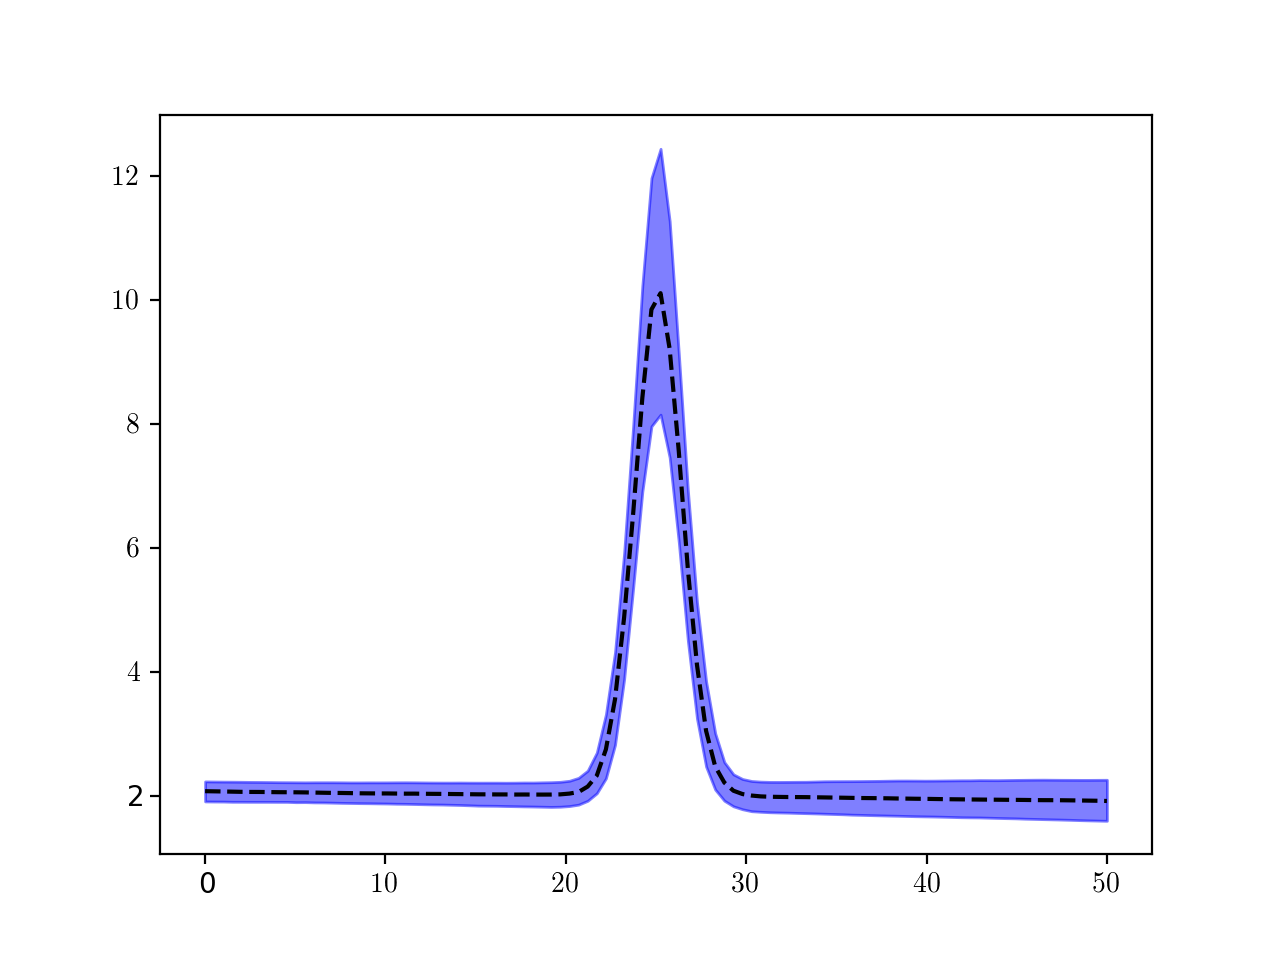

equal-tail: 2.070 +/- 0.16, hpd: 2.07 -0.17 +0.15


VBox(children=(HTML(value=u'Propagating errors : '), HTML(value=u''), FloatProgress(value=0.0)))

In [27]:
def go(fitfun, ar, model):
    
    fig, ax = plt.subplots()
    
    # Gather the parameter variates
    
    arguments = {}

    for par in fitfun.parameters.values():

        if par.free:

            this_name = par.name
            
            this_variate = ar.get_variates(par.path)
            
            # Do not use more than 1000 values (would make computation too slow for nothing)
            
            if len(this_variate) > 1000:
                
                this_variate = np.random.choice(this_variate, size=1000)
            
            arguments[this_name] = this_variate
    
    # Prepare the error propagator function
    
    pp = ar.propagate(ar.optimized_model.fake.spectrum.main.shape.evaluate_at, **arguments)
    
    # You can just use it as:
    
    print(pp(5.0))
    
    #Make the plot
    
    energies = np.linspace(0, 50, 100)

    low_curve = np.zeros_like(energies)
    middle_curve = np.zeros_like(energies)
    hi_curve = np.zeros_like(energies)

    free_parameters = model.free_parameters
    
    with progress_bar(len(energies), title="Propagating errors") as p:
        
        with use_astromodels_memoization(False):
        
            for i, e in enumerate(energies):

                this_flux = pp(e)
                
                low_bound, hi_bound = this_flux.equal_tail_interval()
                
                low_curve[i], middle_curve[i], hi_curve[i] = (low_bound, this_flux.median, hi_bound)

                p.increase()

    ax.plot(energies, middle_curve, '--', color='black')
    ax.fill_between(energies, low_curve, hi_curve, alpha=0.5, color='blue')

go(fitfun, ar, model)

## Bayesian Analysis Results
Analysis Results work exactly the same under Bayesian analysis. 

Let's run the analysis first.

In [28]:

for parameter in ar.optimized_model:
    
    model[parameter.path].value = parameter.value

model.fake.spectrum.main.composite.a_1.set_uninformative_prior(Uniform_prior)
model.fake.spectrum.main.composite.b_1.set_uninformative_prior(Uniform_prior)
model.fake.spectrum.main.composite.F_2.set_uninformative_prior(Log_uniform_prior)
model.fake.spectrum.main.composite.mu_2.set_uninformative_prior(Uniform_prior)
model.fake.spectrum.main.composite.sigma_2.set_uninformative_prior(Log_uniform_prior)

bs = BayesianAnalysis(model, data)

samples = bs.sample(20, 100, 1000)

VBox(children=(HTML(value=u'Burn-in : '), HTML(value=u''), FloatProgress(value=0.0)))

VBox(children=(HTML(value=u'Sampling : '), HTML(value=u''), FloatProgress(value=0.0)))


Mean acceptance fraction: 0.54715

Maximum a posteriori probability (MAP) point:



,result,unit
parameter,,
fake.spectrum.main.composite.a_1,(-3.000 +/- 6) x 10^-3,1 / (cm2 keV2 s)
fake.spectrum.main.composite.b_1,2.10 -0.17 +0.18,1 / (cm2 keV s)
fake.spectrum.main.composite.F_2,(2.5 -0.7 +0.6) x 10,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,(2.512 -0.027 +0.025) x 10,keV
fake.spectrum.main.composite.sigma_2,1.38 -0.26 +0.24,keV



Values of -log(posterior) at the minimum:



,-log(posterior)
sim_data,-25.096557
total,-25.096557



Values of statistical measures:



,statistical measures
AIC,61.556750
BIC,69.753229
DIC,61.119499
PDIC,5.368218


Again, we grab the results from the BayesianAnalysis object:

In [29]:
ar2 = bs.results

We can write and read the results to/from a file:

In [30]:
ar2.write_to("test_bayes.fits", overwrite=True)

In [31]:
ar2_reloaded = load_analysis_results("test_bayes.fits")

The AR holds the posterior samples from the analysis. We can see the saved and live reults are the same:

In [32]:
np.allclose(ar2_reloaded.samples, ar2.samples)

True

**NOTE:** *MLE AR's store samples as well. These are the samples from the covariance matrix*

We can examine the marginal distributions of the parameters:

This method is deprecated. Please use chainConsumer.plotter.plot instead


<IPython.core.display.Javascript object>


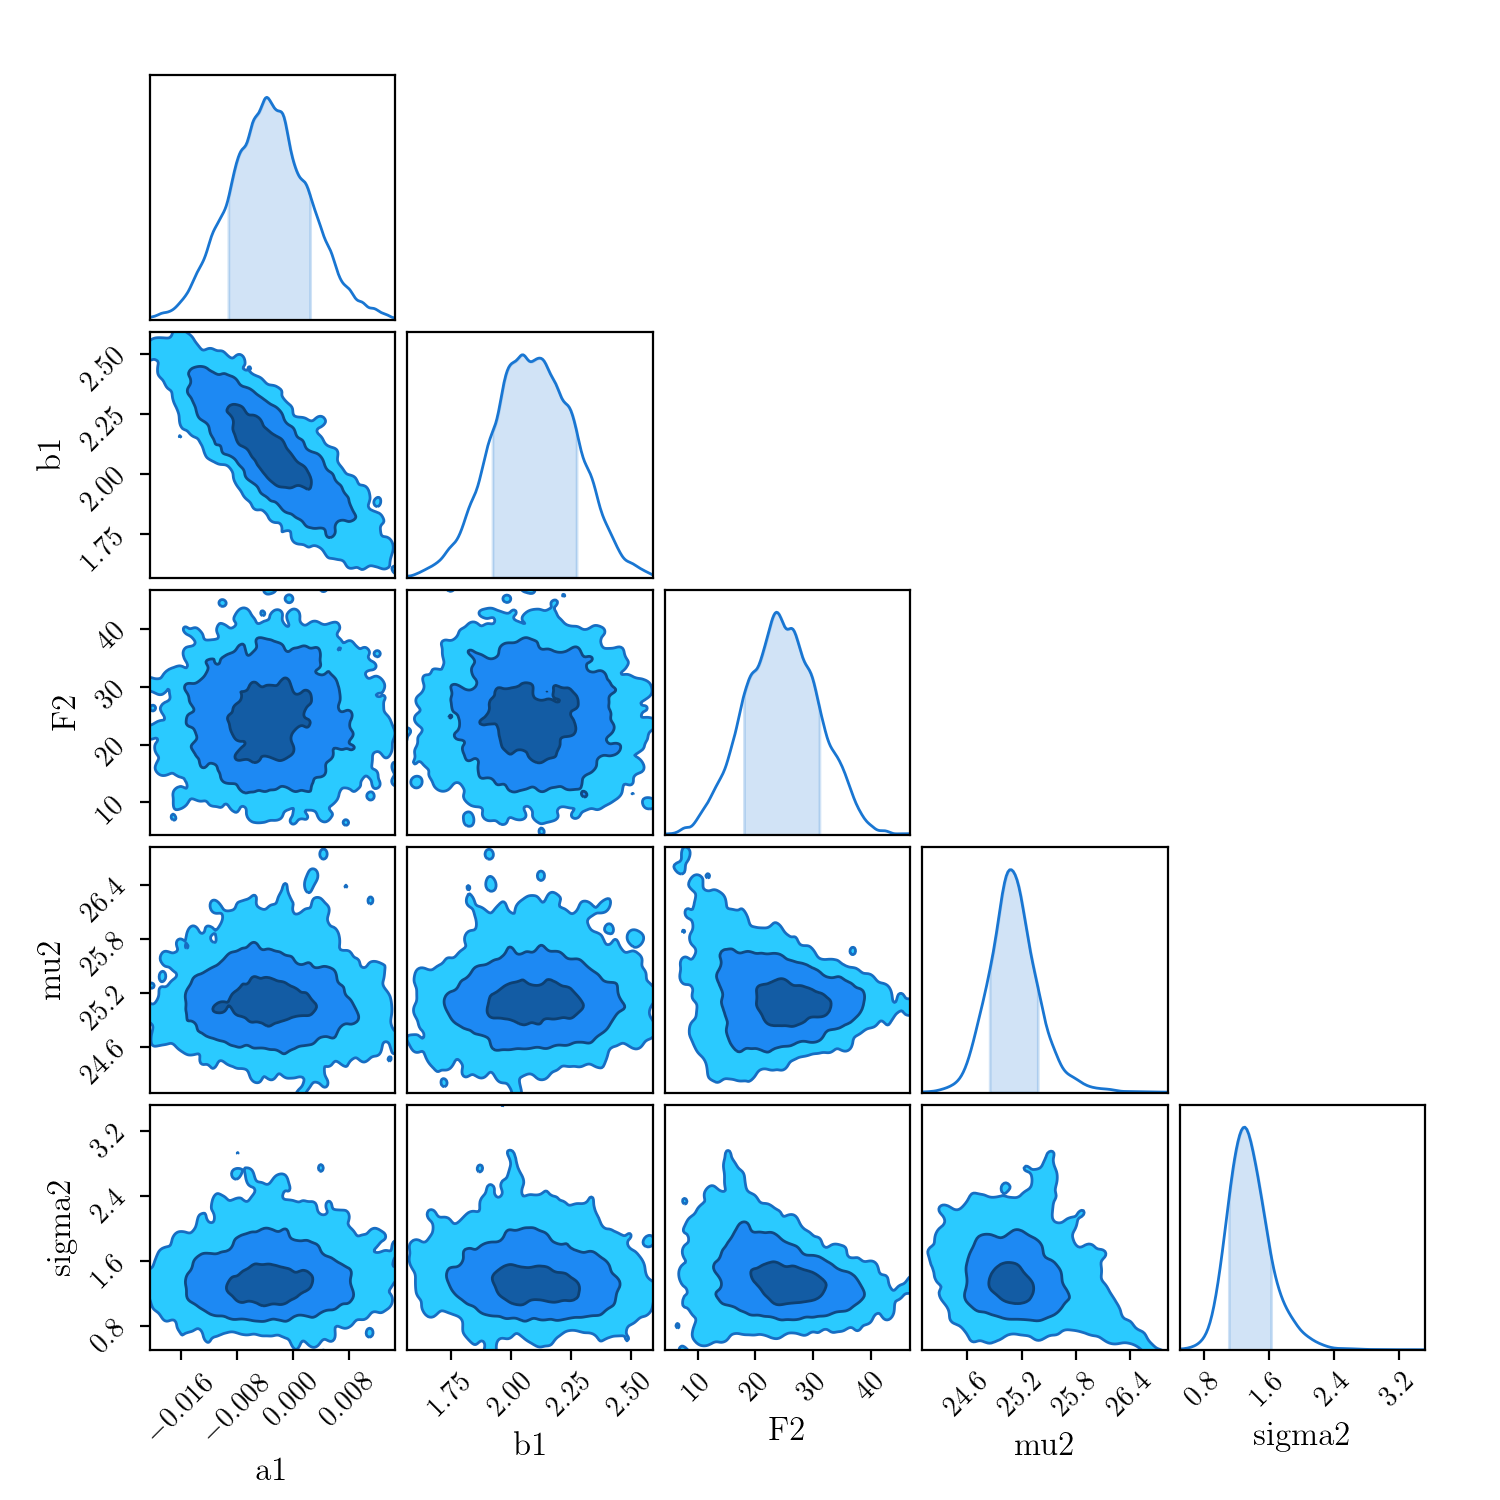

In [33]:
#ar2.corner_plot();

# with chain consumer (pretty!)
ar2.corner_plot_cc();

We can return pandas DataFrames with equal tail or HPD results.

In [34]:
ar2.get_data_frame("equal tail")

,value,negative_error,positive_error,error,unit
fake.spectrum.main.composite.a_1,-0.003358,-0.005703,0.005770,0.005737,1 / (cm2 keV2 s)
fake.spectrum.main.composite.b_1,2.096046,-0.172938,0.175478,0.174208,1 / (cm2 keV s)
fake.spectrum.main.composite.F_2,24.568478,-6.504258,6.449505,6.476882,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,25.119405,-0.265771,0.250708,0.258239,keV
fake.spectrum.main.composite.sigma_2,1.376914,-0.256613,0.240484,0.248548,keV


In [35]:
ar2.get_data_frame("hpd")

,value,negative_error,positive_error,error,unit
fake.spectrum.main.composite.a_1,-0.003358,-0.005662,0.005790,0.005726,1 / (cm2 keV2 s)
fake.spectrum.main.composite.b_1,2.096046,-0.157539,0.189030,0.173285,1 / (cm2 keV s)
fake.spectrum.main.composite.F_2,24.568478,-6.974409,5.927552,6.450980,1 / (cm2 s)
fake.spectrum.main.composite.mu_2,25.119405,-0.281536,0.232670,0.257103,keV
fake.spectrum.main.composite.sigma_2,1.376914,-0.292979,0.187602,0.240290,keV


Error propagation operates the same way. Internally, the process is the same as the MLE results, however, the samples are those of the posterior rather than the (assumed) covariance matrix.

In [36]:
p1 = ar2.get_variates("fake.spectrum.main.composite.a_1")
p2 = ar2.get_variates("fake.spectrum.main.composite.b_1")

print(p1)
print(p2)

res = p1 + p2

print(res)


equal-tail: (-3.000 +/- 6) x 10^-3, hpd: (-3.000 +/- 6) x 10^-3
equal-tail: 2.09 -0.17 +0.18, hpd: 2.09 -0.16 +0.19
equal-tail: 2.090 +/- 0.17, hpd: 2.09 -0.17 +0.16


To demonstrate how the two objects (MLE and Bayes) are the same, we see that our plotting function written for the MLE result works on our Bayesian results seamlessly.

<IPython.core.display.Javascript object>


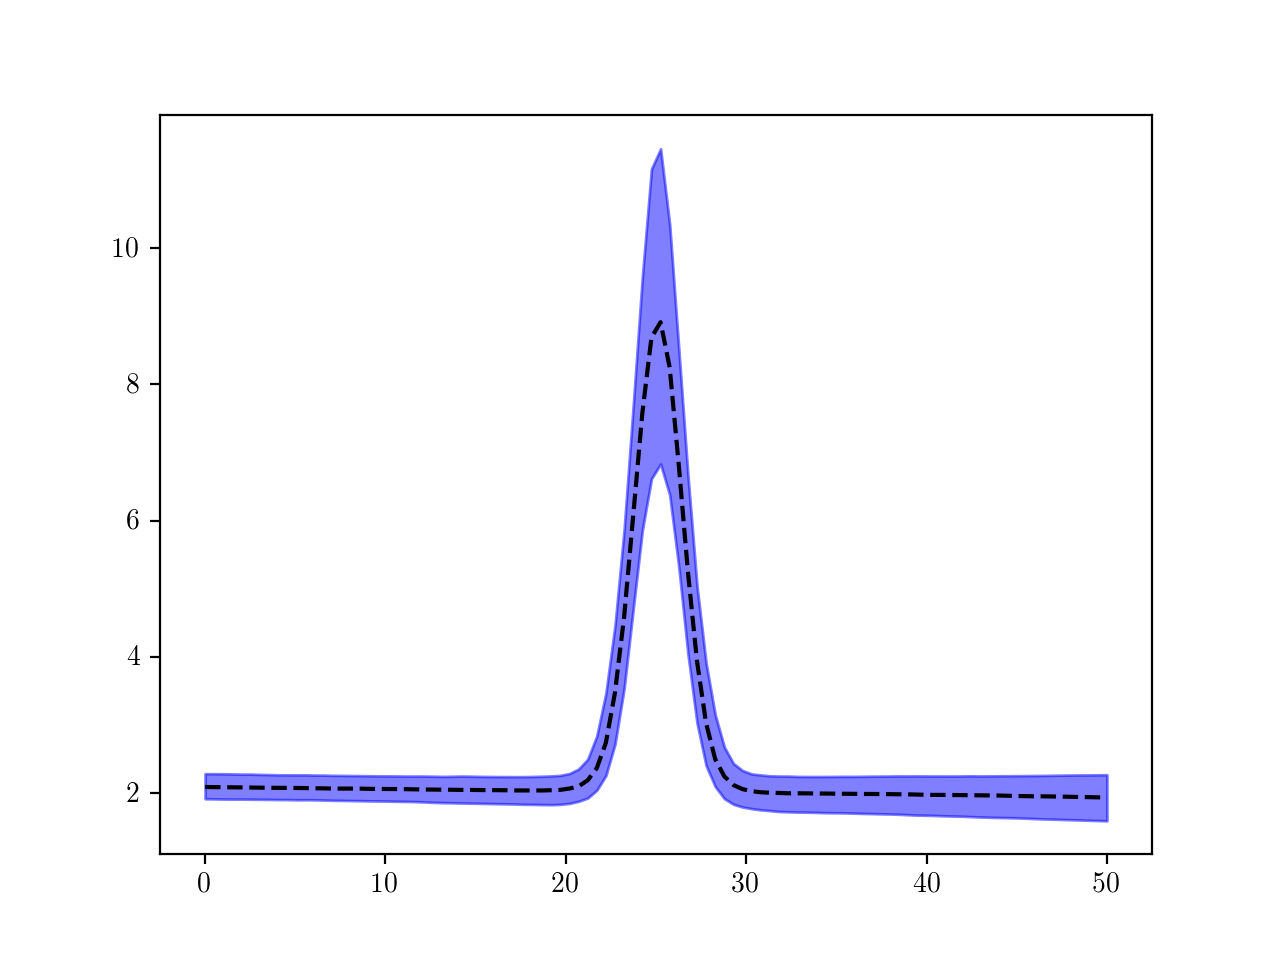

equal-tail: 2.07 -0.17 +0.19, hpd: 2.07 -0.18 +0.19


VBox(children=(HTML(value=u'Propagating errors : '), HTML(value=u''), FloatProgress(value=0.0)))

In [37]:
go(fitfun, ar2, model)